# classification using ANN

In [ ]:
#import statements
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#loading and splitting data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
len(x_test)

10000

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

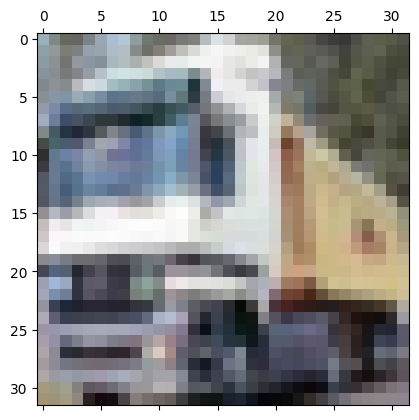

In [ ]:
plt.matshow(x_train[1])

In [ ]:
#reshaping
y_train = y_train.reshape(-1)
y_train[2]

9

In [ ]:
#Scaling
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
#importing libraries
from keras import models, layers
from keras.layers import Dense,Activation,Flatten,Input,Conv2D,MaxPooling2D
from keras.optimizers import SGD

In [ ]:
#ANN model
model = models.Sequential()
model.add(layers.Flatten(input_shape = (32, 32, 3)))
model.add(layers.Dense(64, input_shape = (32,32,3), activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
#compiling the model
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#fitting the model
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9084 - accuracy: 0.3150
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7434 - accuracy: 0.3821
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6717 - accuracy: 0.4136
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6254 - accuracy: 0.4289
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5912 - accuracy: 0.4417
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5633 - accuracy: 0.4512
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5412 - accuracy: 0.4565
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5198 - accuracy: 0.4664
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5012 - accuracy: 0.4730
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.485

In [ ]:
#evaluation
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4994 - accuracy: 0.4730


[1.4993871450424194, 0.4729999899864197]

In [ ]:
#prediction using ANN model
y_pred = model.predict(x_test)
y_pred[5]

313/313 [==============================] - 1s 3ms/step


array([9.5916661e-03, 1.8609606e-02, 7.5758427e-02, 2.2430015e-01,
       5.4261655e-02, 1.7886837e-01, 3.7395933e-01, 3.8829144e-02,
       2.9660418e-04, 2.5525091e-02], dtype=float32)

In [ ]:
#testing
y_pred_lab = [np.argmax(i) for i in y_pred]
y_pred_lab[:5]

[3, 9, 8, 8, 4]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
#report that contains precision, recall(sensitivity), accuracy
from sklearn.metrics import classification_report
classification_report(y_test, y_pred_lab)

'              precision    recall  f1-score   support\n\n           0       0.60      0.41      0.49      1000\n           1       0.59      0.59      0.59      1000\n           2       0.36      0.36      0.36      1000\n           3       0.40      0.27      0.32      1000\n           4       0.41      0.36      0.38      1000\n           5       0.47      0.23      0.31      1000\n           6       0.44      0.68      0.54      1000\n           7       0.52      0.53      0.52      1000\n           8       0.45      0.75      0.56      1000\n           9       0.53      0.56      0.55      1000\n\n    accuracy                           0.47     10000\n   macro avg       0.48      0.47      0.46     10000\nweighted avg       0.48      0.47      0.46     10000\n'

In [ ]:
#confusion matrix
con_mat = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_lab)
con_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[410,  34,  92,  13,  25,   4,  27,  41, 303,  51],
       [ 24, 586,  16,  12,  22,  14,  26,  27, 127, 146],
       [ 56,  35, 358,  58, 118,  46, 168,  74,  67,  20],
       [ 32,  34, 104, 274,  74,  83, 191,  73,  73,  62],
       [ 40,  13, 150,  38, 357,  25, 203,  95,  59,  20],
       [ 11,  22, 112, 176,  89, 229, 142, 102,  83,  34],
       [  8,  23,  71,  47,  76,  15, 680,  28,  33,  19],
       [ 26,  23,  61,  42,  81,  46,  59, 529,  51,  82],
       [ 51,  56,  18,  17,  21,   7,  15,  13, 748,  54],
       [ 28, 166,  14,  14,  16,  15,  22,  42, 124, 559]], dtype=int32)>

Text(170.72222222222223, 0.5, 'actual_values')

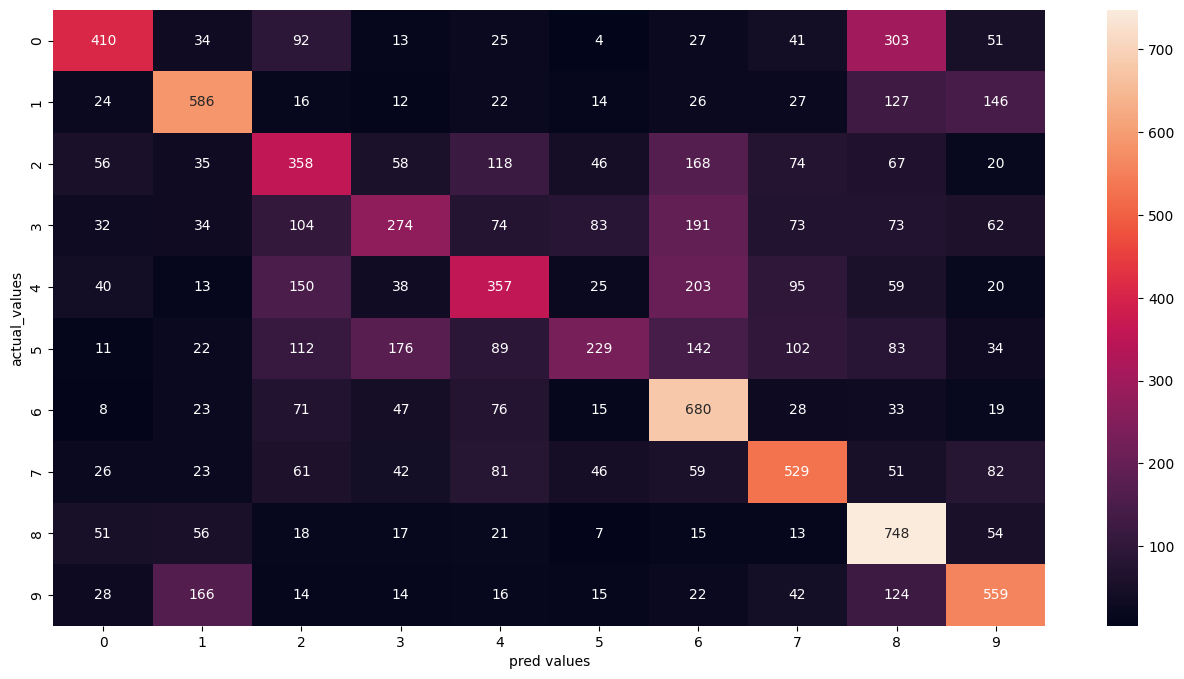

In [ ]:
#plotting the confusion matrix
plt.figure(figsize = (16, 8))
sns.heatmap(con_mat, annot = True, fmt = 'd')
plt.xlabel("pred values")
plt.ylabel("actual_values")

#classification using CNN

In [ ]:
#CNN model building
cnnModel= models.Sequential()
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu", input_shape=(32,32,3)))
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(MaxPooling2D((2,2)))
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(MaxPooling2D((2,2)))
cnnModel.add(Flatten())
cnnModel.add(Dense(100,activation="relu"))
cnnModel.add(Dense(200,activation="relu"))
cnnModel.add(Dense(10,activation="softmax"))

In [ ]:
#compiling
cnnModel.compile(optimizer='sgd',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
#fitting the model
cnnModel.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.9643 - accuracy: 0.2863
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5269 - accuracy: 0.4503
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3313 - accuracy: 0.5265
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1847 - accuracy: 0.5788
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0634 - accuracy: 0.6241
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9521 - accuracy: 0.6658
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8523 - accuracy: 0.7028
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7556 - accuracy: 0.7352
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6611 - accuracy: 0.7687
Epoch 10/10
1563/1563 [==============================] - 16s 10m

In [ ]:
#evaluation
cnnModel.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9482 - accuracy: 0.6838


[0.9481759071350098, 0.6837999820709229]

In [ ]:
#prediction using CNN model
y_pred = cnnModel.predict(x_test)
y_pred[5]

313/313 [==============================] - 2s 5ms/step


array([0.00058472, 0.00161208, 0.07526295, 0.25738132, 0.343046  ,
       0.05949448, 0.2553863 , 0.00324856, 0.00047412, 0.00350944],
      dtype=float32)

In [ ]:
#testing
y_pred_lab = [np.argmax(i) for i in y_pred]
y_pred_lab[:5]

[5, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
#classification report for the CNN model
classification_report(y_test, y_pred_lab)

'              precision    recall  f1-score   support\n\n           0       0.82      0.66      0.73      1000\n           1       0.81      0.76      0.78      1000\n           2       0.63      0.55      0.59      1000\n           3       0.47      0.56      0.51      1000\n           4       0.53      0.77      0.63      1000\n           5       0.63      0.54      0.58      1000\n           6       0.78      0.71      0.74      1000\n           7       0.80      0.70      0.75      1000\n           8       0.78      0.82      0.80      1000\n           9       0.74      0.77      0.75      1000\n\n    accuracy                           0.68     10000\n   macro avg       0.70      0.68      0.69     10000\nweighted avg       0.70      0.68      0.69     10000\n'

In [ ]:
#confution matrix
con_mat = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_lab)
con_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[661,  24,  61,  36,  39,  11,  14,  10, 100,  44],
       [ 16, 755,  10,  23,   8,   5,  14,   3,  35, 131],
       [ 48,   4, 554,  95, 168,  41,  37,  31,  13,   9],
       [  6,   9,  50, 555, 115, 134,  67,  28,  16,  20],
       [  8,   1,  44,  64, 774,  26,  33,  36,  11,   3],
       [  6,   3,  50, 230,  88, 539,  23,  47,   6,   8],
       [  5,   1,  44,  81, 108,  25, 715,   6,   6,   9],
       [  5,   2,  33,  52, 129,  52,   6, 703,   8,  10],
       [ 36,  45,  11,  22,  24,   8,   7,   1, 817,  29],
       [ 15,  89,  16,  27,  18,  11,   4,  19,  36, 765]], dtype=int32)>

Text(170.72222222222223, 0.5, 'actual_values')

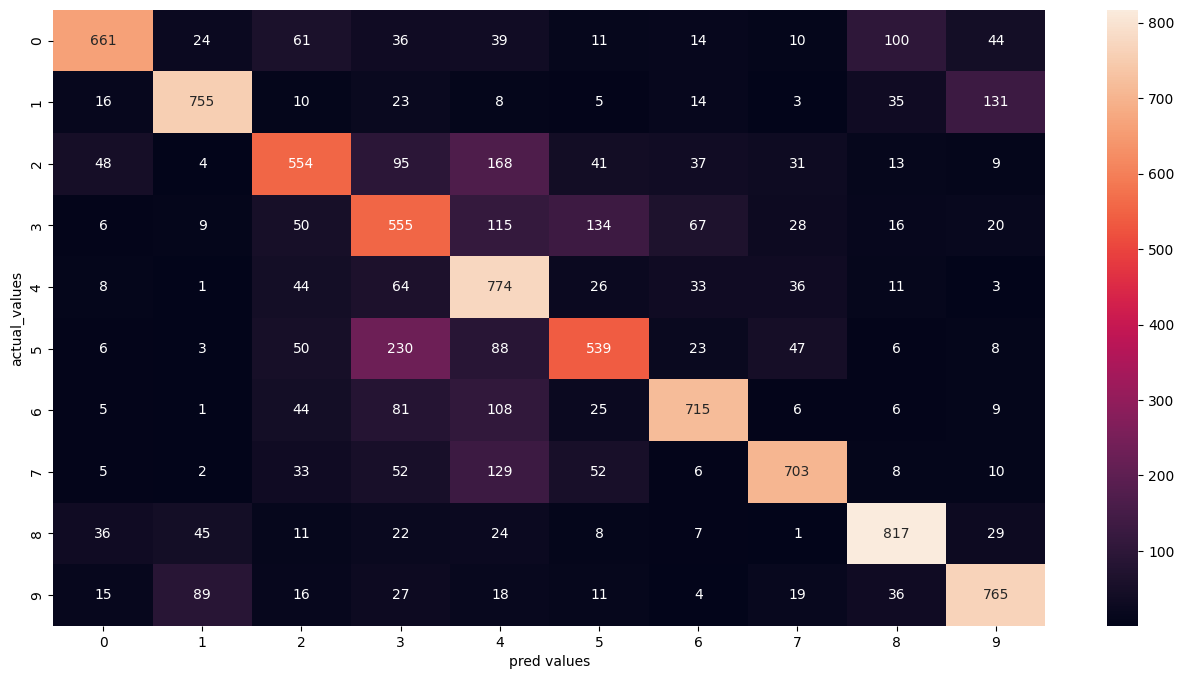

In [ ]:
#plotting the confusion matrix
plt.figure(figsize = (16, 8))
sns.heatmap(con_mat, annot = True, fmt = 'd')
plt.xlabel("pred values")
plt.ylabel("actual_values")